<a href="https://colab.research.google.com/github/unna97/fastai/blob/master/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pydub #used to handle audio file
#!pip install pysoundfile


#all the imports
import matplotlib.pyplot as plot
import pandas as pd
from pydub import AudioSegment
import IPython
import soundfile as sf
import numpy as np


##Data Wrangling

In [0]:
#the dataset of audio file:
#download dataset function
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")


####download dataset and read dataset
reference 
1. https://medium.com/@Keshav31/colab-features-download-and-upload-e1ec537a83df
2. https://github.com/karoldvl/ESC-50

In [0]:
download('https://github.com/karoldvl/ESC-50/archive/master.zip','envsound.zip')
print("All the files are downloaded")

Download file... envsound.zip ...
File downloaded
All the files are downloaded


##### create the right directory and store in that


In [0]:
!mkdir '/content/env_sound'
!cp '/content/envsound.zip' '/content/env_sound/'

In [0]:
!rm '/content/envsound.zip'

#####unzip the file

syntax-  !unzip filename.zip -d path/to/extract/to

In [0]:
!unzip '/content/env_sound/envsound.zip' -d '/content/env_sound/'

In [0]:
!ls '/content/env_sound/ESC-50-master/audio' 

1-100032-A-0.wav   2-118624-A-30.wav  3-151212-A-24.wav  4-196671-A-8.wav
1-100038-A-14.wav  2-118625-A-30.wav  3-151213-A-24.wav  4-196671-B-8.wav
1-100210-A-36.wav  2-118817-A-32.wav  3-151255-A-28.wav  4-196672-A-8.wav
1-100210-B-36.wav  2-118964-A-0.wav   3-151269-A-35.wav  4-197103-A-6.wav
1-101296-A-19.wav  2-119102-A-21.wav  3-151273-A-35.wav  4-197454-A-28.wav
1-101296-B-19.wav  2-119139-A-31.wav  3-151557-A-28.wav  4-197454-B-28.wav
1-101336-A-30.wav  2-119161-A-8.wav   3-151557-B-28.wav  4-197871-A-15.wav
1-101404-A-34.wav  2-119161-B-8.wav   3-152007-A-20.wav  4-198025-A-23.wav
1-103298-A-9.wav   2-119161-C-8.wav   3-152007-B-20.wav  4-198360-A-49.wav
1-103995-A-30.wav  2-119748-A-38.wav  3-152007-C-20.wav  4-198360-B-49.wav
1-103999-A-30.wav  2-120218-A-30.wav  3-152007-D-20.wav  4-198360-C-49.wav
1-104089-A-22.wav  2-120218-B-30.wav  3-152007-E-20.wav  4-198841-A-37.wav
1-104089-B-22.wav  2-120333-A-32.wav  3-152020-A-36.wav  4-198962-A-25.wav
1-105224-A-22.wav  2-120586-A

#####master path

In [0]:
path = '/content/env_sound/ESC-50-master/audio/'
p='/content/env_sound/ESC-50-master/meta/esc50.csv'

In [0]:
data=pd.read_csv(p)
data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [0]:
#using path + data.filename[index]=audio location
#IPython.display.Audio(path+data.filename[0])
dogs=data.index[data.category=='dog']
IPython.display.Audio(path+data.filename[dogs[3]] )



####Conversion of sound to images for CNN

In [0]:
signalData,samplingFrequency=sf.read(path+data.filename[dogs[3]])

In [0]:
def graph_spectrogram(wav_file):
    sound_info, frame_rate = sf.read(path)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)

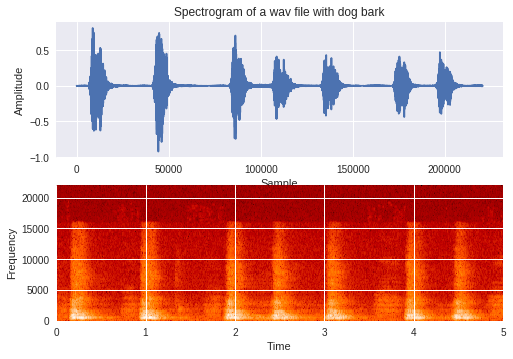

In [0]:
plot.subplot(211)

plot.title('Spectrogram of a wav file with dog bark')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

y=plot.specgram(signalData,Fs=samplingFrequency,cmap=plot.cm.gist_heat)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

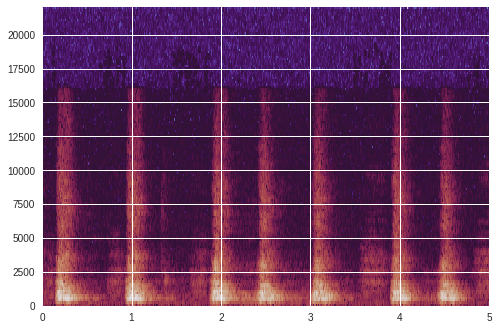

In [0]:
x=plot.specgram(signalData,Fs=samplingFrequency,cmap=plot.cm.twilight)


In [0]:
plot.plot